In [5]:
from google.colab import files
uploaded = files.upload()

# Load the uploaded file
import pandas as pd
glass = pd.read_csv('glass.csv')
print(glass.head())


Saving glass.csv to glass.csv
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [6]:
glass.Type.value_counts().sort_index()

,count
Type,
1,70
2,76
3,17
5,13
6,9
7,29


In [7]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

,count
household,
0,163
1,51


In [8]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

In [9]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1 (household)

# Thresholds to try
thresholds = [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9]

# Evaluate different thresholds
for threshold in thresholds:
    # Convert probabilities to binary predictions using the threshold
    predictions = (probs >= threshold).astype(int)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)

    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")


Threshold: 0.10, Accuracy: 0.42, Precision: 0.31, Recall: 1.00
Threshold: 0.20, Accuracy: 0.77, Precision: 0.52, Recall: 1.00
Threshold: 0.30, Accuracy: 0.81, Precision: 0.60, Recall: 0.82
Threshold: 0.40, Accuracy: 0.88, Precision: 0.75, Recall: 0.82
Threshold: 0.50, Accuracy: 0.88, Precision: 0.88, Recall: 0.64
Threshold: 0.60, Accuracy: 0.84, Precision: 0.83, Recall: 0.45
Threshold: 0.70, Accuracy: 0.84, Precision: 1.00, Recall: 0.36
Threshold: 0.80, Accuracy: 0.79, Precision: 1.00, Recall: 0.18
Threshold: 0.90, Accuracy: 0.79, Precision: 1.00, Recall: 0.18


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

elements = ['RI', 'Na', 'Mg', 'Si', 'K', 'Ca', 'Ba', 'Fe']
for ele in elements:
    X = np.array(glass[ele]).reshape(-1, 1)
    y = glass.household

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    probs = model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1 (household)

    # Thresholds to try
    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    # Evaluate different thresholds
    for threshold in thresholds:
        # Convert probabilities to binary predictions using the threshold
        predictions = (probs >= threshold).astype(int)

        # Check for any positive predictions
        if predictions.sum() == 0:
            precision = 0.0
            recall = 0.0
        else:
            # Compute evaluation metrics
            precision = precision_score(y_test, predictions, zero_division=0)
            recall = recall_score(y_test, predictions, zero_division=0)

        accuracy = accuracy_score(y_test, predictions)

        print(f"Element:{ele}, Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")


Element:RI, Threshold: 0.10, Accuracy: 0.26, Precision: 0.26, Recall: 1.00
Element:RI, Threshold: 0.20, Accuracy: 0.26, Precision: 0.26, Recall: 1.00
Element:RI, Threshold: 0.30, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.40, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.50, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.60, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.70, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.80, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.90, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:Na, Threshold: 0.10, Accuracy: 0.49, Precision: 0.31, Recall: 0.82
Element:Na, Threshold: 0.20, Accuracy: 0.77, Precision: 0.53, Recall: 0.73
Element:Na, Threshold: 0.30, Accuracy: 0.88, Precision: 0.80, Recall: 0.73
Element:Na, Threshold: 0.40, Accuracy: 0.88, Precision: 0.80, Recall: 0.73
Element:Na, Threshold: 0.

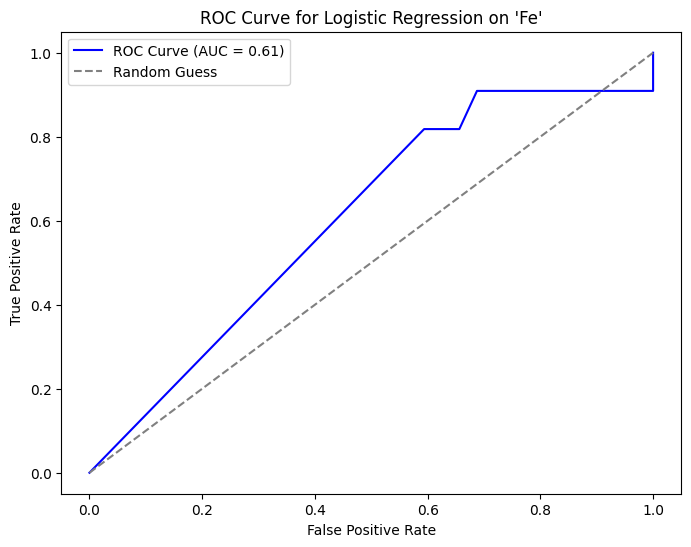

In [14]:
# Plot ROC Curve for each element
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, probs)  # False Positive Rate, True Positive Rate
auc = roc_auc_score(y_test, probs)  # Area Under the Curve

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve for Logistic Regression on '{ele}'")
plt.legend()
plt.show()


In [12]:
# Drop the target variable from the features
X = glass.drop(columns=['Type', 'household'])

# Target variable
y = glass['household']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9069767441860465


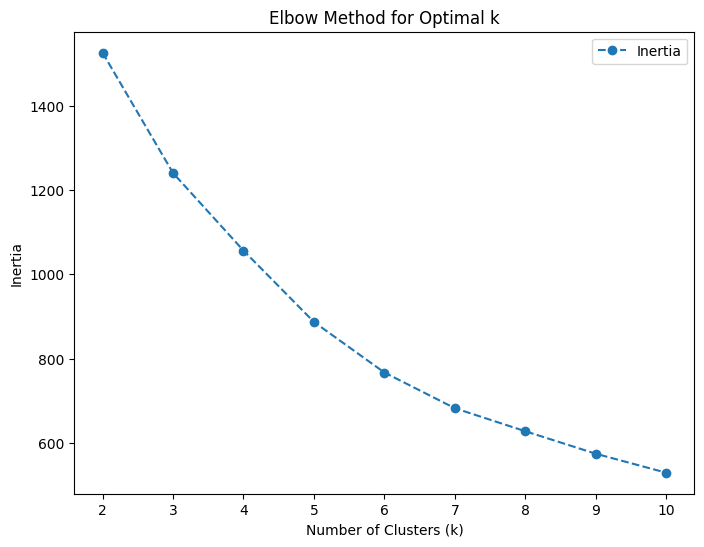

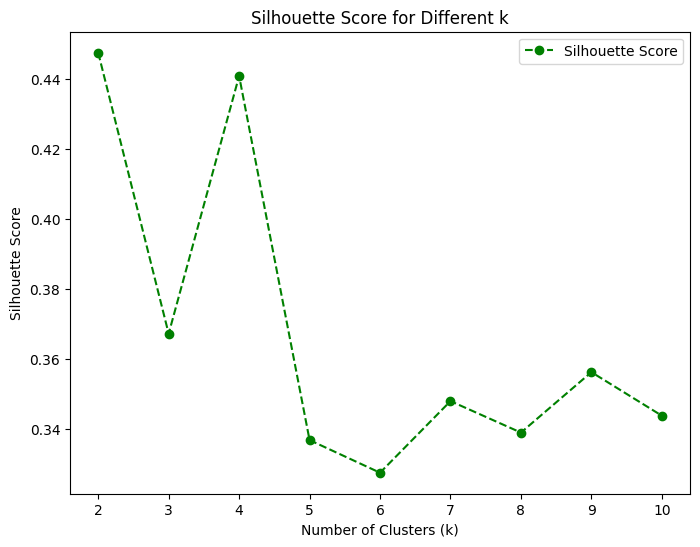

The optimal number of clusters based on silhouette score is: 2


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
X_clustering = glass.drop(columns=['Type', 'household'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Try different values of k
k_values = range(2, 11)  # Test k from 2 to 10
inertia = []
silhouette = []

# Loop to calculate inertia and silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Inertia (Elbow Method)
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', label="Inertia")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette, marker='o', linestyle='--', color='green', label="Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k")
plt.legend()
plt.show()

# Print the best k based on Silhouette Score
best_k = k_values[silhouette.index(max(silhouette))]
print(f"The optimal number of clusters based on silhouette score is: {best_k}")


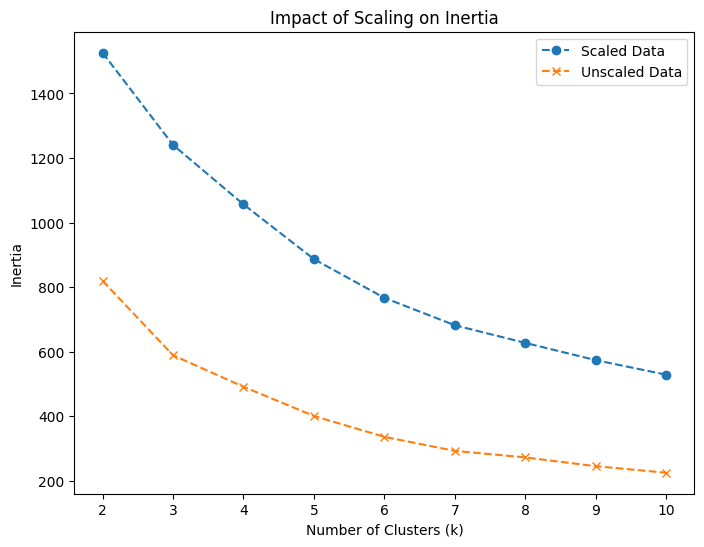

Comparison of inertia scores:
k = 2, Scaled Inertia = 1526.28, Unscaled Inertia = 819.63
k = 3, Scaled Inertia = 1240.59, Unscaled Inertia = 589.03
k = 4, Scaled Inertia = 1056.39, Unscaled Inertia = 491.43
k = 5, Scaled Inertia = 886.86, Unscaled Inertia = 400.84
k = 6, Scaled Inertia = 766.78, Unscaled Inertia = 336.27
k = 7, Scaled Inertia = 682.02, Unscaled Inertia = 292.85
k = 8, Scaled Inertia = 627.33, Unscaled Inertia = 272.62
k = 9, Scaled Inertia = 573.94, Unscaled Inertia = 245.35
k = 10, Scaled Inertia = 528.82, Unscaled Inertia = 225.19


In [16]:
# K-Means without scaling
inertia_no_scaling = []
silhouette_no_scaling = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_clustering)  # Unscaled data
    inertia_no_scaling.append(kmeans.inertia_)
    silhouette_no_scaling.append(silhouette_score(X_clustering, kmeans.labels_))

# Compare results: Scaled vs Unscaled
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', label='Scaled Data')
plt.plot(k_values, inertia_no_scaling, marker='x', linestyle='--', label='Unscaled Data')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Impact of Scaling on Inertia")
plt.legend()
plt.show()

print("Comparison of inertia scores:")
for i, k in enumerate(k_values):
    print(f"k = {k}, Scaled Inertia = {inertia[i]:.2f}, Unscaled Inertia = {inertia_no_scaling[i]:.2f}")
